In [1]:
import io
import os

from google.cloud import vision
from google.cloud.vision import types

import matplotlib.pyplot as plt
import cv2

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="Computer Vision-51f5d123b7b8.json"

In [3]:
client = vision.ImageAnnotatorClient()

In [4]:
file_name = os.path.abspath('images/scarlett_johansson.jpeg')

with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

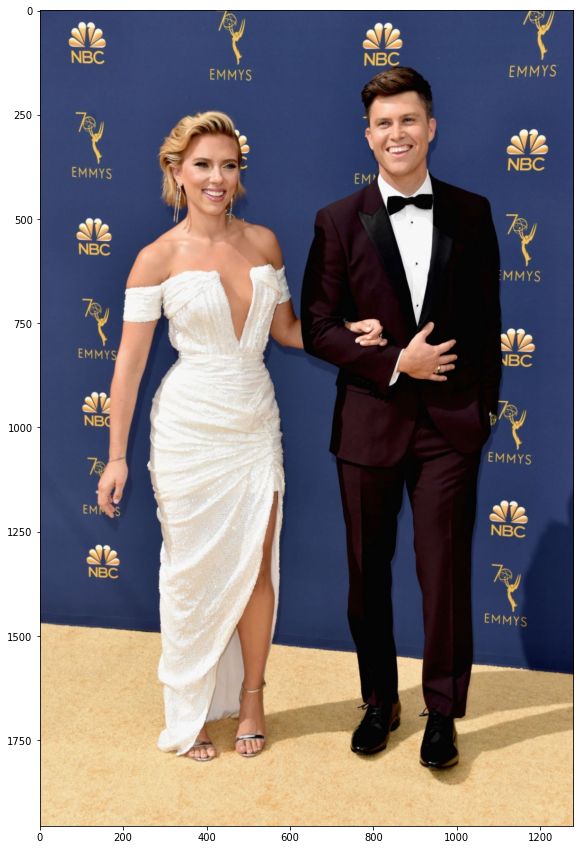

In [5]:
def img2rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15, 15))
plt.imshow(img2rgb(cv2.imread(file_name)))

## Label detection

In [ ]:
# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.description)

## Object localization

In [ ]:
response = client.object_localization(image=image)
for obj in response.localized_object_annotations:
    print(obj.name)

## Face detection

In [ ]:
response = client.face_detection(image=image)

In [ ]:
for face in response.face_annotations:
    print('-' * 20 + 'face' + '-' * 20)
    print()
    print('bounding_poly')
    print(face.bounding_poly)
    print()
    print('fd_bounding_poly')
    print(face.fd_bounding_poly)
    print()
    print('landmarks')
    print(face.landmarks)
    print()
    print('angle')
    print(face.roll_angle, face.pan_angle, face.tilt_angle)
    print()
    print('joy sorrow anger surprise under_exposed blurred headwear')
    print(face.joy_likelihood, face.sorrow_likelihood, face.anger_likelihood, face.surprise_likelihood,
         face.under_exposed_likelihood, face.blurred_likelihood, face.headwear_likelihood)
    print()